# 評估分類模型

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

## 使用邏輯式迴歸產生分類結果

In [3]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
predicted = clf.predict(iris.data)

In [9]:
sum(predicted == iris.target) / len(iris.target)

0.95999999999999996

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, iris.target)

0.95999999999999996

In [11]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(iris.target, predicted)
m

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

## 使用SVM 產生分類結果

In [13]:
from sklearn.svm import SVC
clf2 = SVC(kernel='linear') 
clf2.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
predicted2 = clf2.predict(iris.data)

In [15]:
from sklearn.metrics import confusion_matrix
m2 = confusion_matrix(iris.target, predicted2)
m2

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

## 視覺化混淆矩陣(Confusion Matrix)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


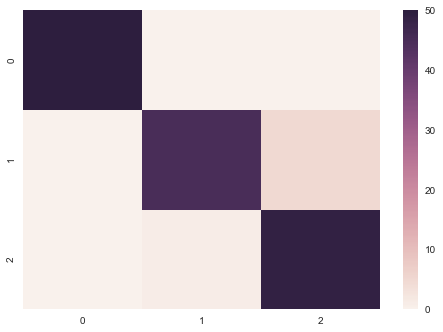

In [16]:
%pylab inline
import seaborn
seaborn.heatmap(m)

## 產生Classfication Report

In [18]:
from sklearn.metrics import classification_report
print(classification_report(predicted , iris.target))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.90      0.98      0.94        46
          2       0.98      0.91      0.94        54

avg / total       0.96      0.96      0.96       150



## 交叉驗證

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()

In [23]:
iris.data.shape

(150, 4)

In [24]:
iris.target.shape

(150,)

## Holdout 驗證

In [28]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target, test_size = 0.33, random_state = 123)

In [29]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(100, 4)
(100,)
(50, 4)
(50,)


In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [31]:
predicted = clf.predict(test_X)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted, test_y)

array([[20,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 17]])

## KFold Cross Validation

In [43]:
from sklearn.model_selection import KFold
kf = KFold(n_splits= 10)
for train, test in kf.split(iris.data, iris.target):
    #train_X = iris.data[train]
    #train_y = iris.target[train]
    #test_X  = iris.data[test]
    #test_y  = iris.target[test]
    train_X, train_y, test_X, test_y = iris.data[train], iris.target[train], iris.data[test], iris.target[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    print(accuracy_score(predicted, test_y))

1.0
1.0
1.0
1.0
0.933333333333
0.8
1.0
0.866666666667
0.8
1.0


In [46]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
acc = cross_val_score(clf, X=iris.data, y= iris.target, cv= 10)
print(acc)

print(acc.mean())
print(acc.std())


[ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  1.          1.          1.        ]
0.96
0.0442216638714


## 留一驗證

In [47]:
from sklearn.model_selection import LeaveOneOut

res = []
loo = LeaveOneOut()

X = iris.data
y = iris.target
for train, test in loo.split(X, y):
    train_X, test_X, train_y, test_y = X[train],X[test], y[train], y[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    res.extend((predicted == test_y).tolist())
sum(res)

144